## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
dataset = pd.read_csv('./dataset/news.csv', index_col=0)
dataset.reset_index(drop=True,inplace=True)
dataset.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


## Data cleaning

In [26]:
dataset.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [27]:
dataset.duplicated().sum()

29

## Exploratory data analysis

In [29]:
dataset['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

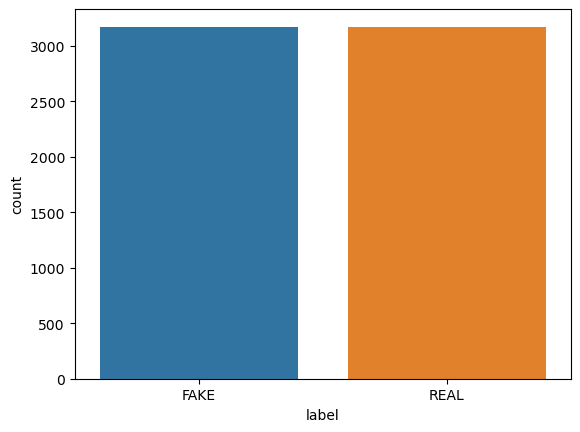

In [30]:
sns.countplot(x='label', data=dataset)
plt.show()

In [31]:
dataset['content'] = dataset['title'] + ' ' + dataset['text']

## Data preprocessing

In [36]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import string

ps=PorterStemmer()
punctuation=string.punctuation
stopwords=stopwords.words('english')

def clean(x):
    x=re.sub("[^a-zA-Z]",' ',str(x)).lower()
    x=x.split()
    words=[ps.stem(w) for w in x if not w in stopwords and not w in punctuation]
    x=" ".join(words)
    return x

dataset["content"] = dataset["content"].apply(lambda x: clean(x))

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [38]:
X_train, X_val, y_train, y_val = train_test_split(dataset['content'], dataset['label'], test_size=.25,\
                                                  random_state=42)

In [40]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_val = tfidf.transform(X_val)

In [41]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [49]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("XGBoost", xgb.XGBClassifier())
]

results = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results.append({"Model": model_name, "Accuracy": accuracy})
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

In [50]:
results_df.head()

,Model,Accuracy
3,XGBoost,0.928030
0,Logistic Regression,0.912247
2,Random Forest,0.898990
1,KNN,0.838384
